In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from iam.added_absence_detectors import IAM

In [3]:
iam = IAM()

In [4]:
iam.feature_layer
iam.absence_detector_layer

# Bright target/patterned mask

## Word condition 

In [5]:
def run_bright_trial(iam, word):
    letter_activations_history = dict(K=[], R = [], D = [], E = [])
    word_activations_history = dict(WORK=[], WORD=[], WEAK=[], WEAR=[])
    
    def take_snapshot():
        for letter, activation_list in letter_activations_history.items():
            activation_list.append(iam.get_letter_activation(position=1, letter=letter))
        
        for word, activation_list in word_activations_history.items():
            activation_list.append(iam.get_word_activation(word))
    
    n_cycles = 40
    n_stim_cycles = 15
    iam.reset_nodes()
    take_snapshot()
    
    for i in range(n_cycles):
        if i < n_stim_cycles:
            iam.present_word(word)
        else:
            patterned_mask = np.hstack((np.ones((4, 6)), np.zeros((4, 14 - 6))))
            iam.feature_layer.activations = patterned_mask
            iam.absence_detector_layer.activations = 1 - patterned_mask
        iam.run_cycle()
        take_snapshot()
    
    return letter_activations_history, word_activations_history

In [6]:
letter_activations_history, word_activations_history = run_bright_trial(iam, 'READ')

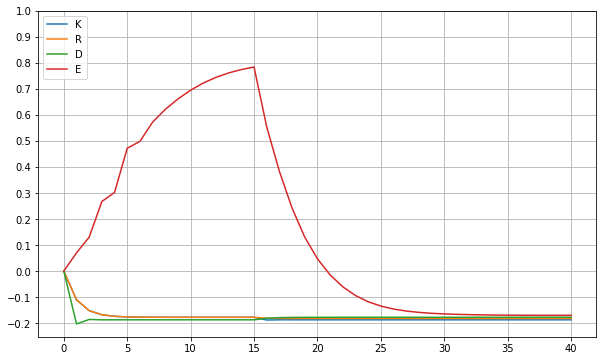

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(letter_activations_history.values())).T)
plt.legend(list(letter_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));